In [126]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.relpath("../src"))

import utility as ut

print("Setup complete.")

Setup complete.


In [127]:
path = os.path.abspath("./train-test")
train_filename = "data_yearly_hourly_train"
test_filename = "data_yearly_hourly_test"
ext = "csv"

raw_train_data = pd.read_csv(os.path.join(path, ".".join([train_filename, ext])), infer_datetime_format = True)
raw_test_data = pd.read_csv(os.path.join(path, ".".join([test_filename, ext])), infer_datetime_format = True)
print("Raw data loaded.")

Raw data loaded.


In [128]:
raw_train_data

,day_of_year,hour,calls,Latitude,Longitude
0,33,12,19,47.602161,-122.331446
1,33,13,20,47.614256,-122.341655
2,33,14,15,47.640749,-122.328970
3,33,15,9,47.620303,-122.331749
4,33,16,15,47.619608,-122.323381
...,...,...,...,...,...
60465,365,19,11,47.602736,-122.327494
60466,365,20,14,47.617627,-122.331832
60467,365,21,10,47.636225,-122.337357
60468,365,22,19,47.595027,-122.340481


In [129]:
raw_train_data[["hour_rel", "day_of_year_rel", "Latitude_rel", "Longitude_rel"]] = raw_train_data[["hour", "day_of_year", "Latitude", "Longitude"]].rolling(4, center = True).mean()
raw_test_data[["hour_rel", "day_of_year_rel", "Latitude_rel", "Longitude_rel"]] = raw_test_data[["hour", "day_of_year", "Latitude", "Longitude"]].rolling(4, center = True).mean()

cols_to_transform = list(raw_train_data.columns)
cols_to_transform.remove("calls") 

train_data = ut.scale(raw_train_data, cols_to_transform)
test_data = ut.scale(raw_test_data, cols_to_transform)

train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

# train_data["hour"] = train_data["hour"] / train_data["hour"].max()
# train_data["day_of_year"] = train_data["day_of_year"] / train_data["day_of_year"].max()
# test_data["hour"] = test_data["hour"] / test_data["hour"].max()
# test_data["day_of_year"] = test_data["day_of_year"] / test_data["day_of_year"].max()

In [130]:
path_to_save = os.path.relpath("./train-test")
train_data.to_csv(os.path.join(path_to_save, ".".join(["train_data", "csv"])), index = False)
test_data.to_csv(os.path.join(path_to_save, ".".join(["test_data", "csv"])), index = False)

<AxesSubplot:xlabel='hour', ylabel='calls'>

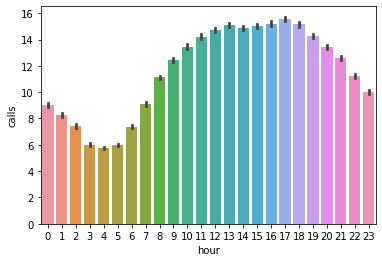

In [33]:
sns.barplot(data = train_data, x = "hour", y = "calls")

<AxesSubplot:xlabel='day_of_year', ylabel='calls'>

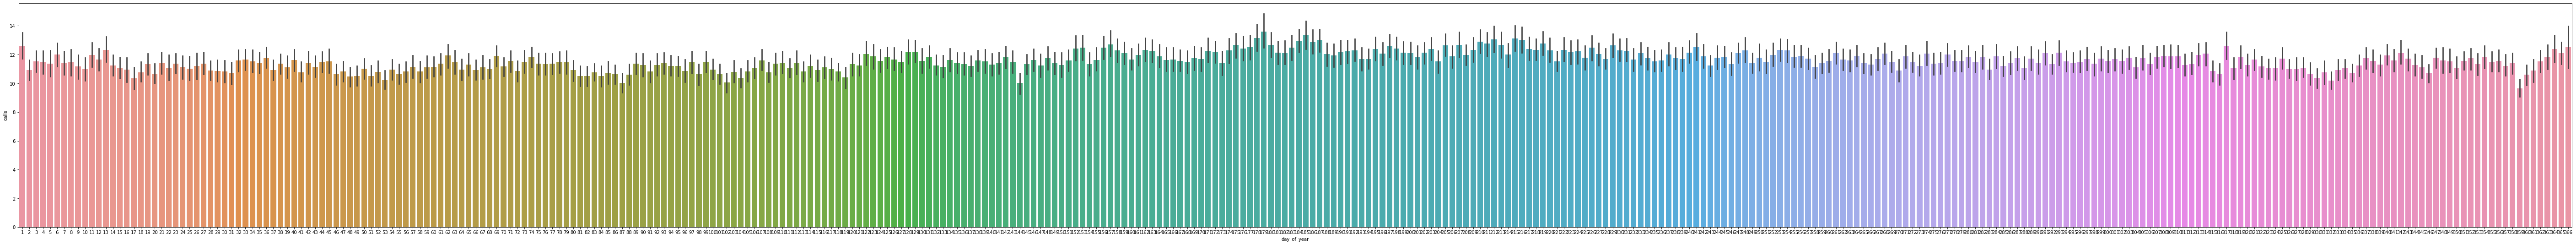

In [43]:
plt.rcParams["figure.figsize"] = (100, 9)
sns.barplot(data = train_data, x = "day_of_year", y = "calls")


In [132]:
train_data

,day_of_year,hour,calls,Latitude,Longitude,hour_rel,day_of_year_rel,Latitude_rel,Longitude_rel
2,-1.458749,0.359770,15,1.123537,0.236468,0.340671,-1.459351,-0.039270,-0.389855
3,-1.458749,0.504226,9,0.030065,-0.032528,0.511792,-1.459351,0.418767,-0.004919
4,-1.458749,0.648681,15,-0.007099,0.777464,0.682914,-1.459351,0.616505,0.798107
5,-1.458749,0.793137,18,0.109490,0.637226,0.854035,-1.459351,-0.312698,1.078456
6,-1.458749,0.937592,14,-0.769344,0.805016,1.025156,-1.459351,-0.418270,0.991776
...,...,...,...,...,...,...,...,...,...
60464,1.720573,0.937592,30,0.224706,-1.353812,1.025156,1.721298,-0.060033,-0.169555
60465,1.720573,1.082048,11,-0.909437,0.379294,1.196277,1.721298,-0.228722,-0.519724
60466,1.720573,1.226503,14,-0.113021,-0.040526,1.367398,1.721298,0.041095,-0.784208
60467,1.720573,1.370959,10,0.881576,-0.575270,1.538519,1.721298,-0.718012,-0.549428


In [134]:
test_data.sort_values("day_of_year")

,day_of_year,hour,calls,Latitude,Longitude,hour_rel,day_of_year_rel,Latitude_rel,Longitude_rel
2,-1.677501,-1.362154,20,-0.457697,-1.168206,-1.709684,-1.684094,1.061094,-0.500211
23,-1.677501,1.661929,12,1.147248,0.495918,0.854842,-1.657040,1.971258,-1.133727
22,-1.677501,1.517925,15,-0.140438,-1.751779,1.709684,-1.684094,0.373962,-0.851515
21,-1.677501,1.373921,8,1.244662,-0.463543,1.538715,-1.684094,-0.546223,-1.025846
20,-1.677501,1.229917,10,-1.480704,0.049128,1.367747,-1.684094,-0.452060,-0.182240
...,...,...,...,...,...,...,...,...,...
745,1.663661,-1.506158,10,0.135495,0.701155,-0.854842,1.643513,-1.082372,2.279399
744,1.663661,-1.650162,8,-0.724805,0.456708,0.000000,1.616460,1.116082,1.473934
755,1.663661,-0.066119,14,0.296767,-0.204688,-0.170968,1.670567,0.178719,-0.062666
768,1.771441,-1.650162,10,-0.064746,0.040991,0.000000,1.724675,0.608798,0.125337
